# Курс по машинному обучению,   ВМК МГУ
# KNN: Классификация и регрессия

### Важно! О формате сдачи

* **Задания из ноутбука, за исключением двух заданий на реализацию кода, оцениваются по системе <font color='red'>кросс-рецензирования</font>.**
* **При решении ноутбука используйте данный шаблон. Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно**
* **Везде, где в формулровке задания есть какой-либо вопрос (или просьба вывода), необходимо прописать ответ в ячейку (код или markdown).**
* **Наличие кода решения обязательно. Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.**

А также..

Если в ячейке написана фраза "Вывод"/"Ответ на вопрос" итд, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано "Your code here", то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст)

### *Примерное время выполнения всех ячеек ноутбука: 10 минут*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать. 

После установки нужных версий нажмите на кнопку Restart runtime, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия. 

На скачивание файла и установку понадобится не более 5 минут.

**Важно!** Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!** Если вы предпочитаете делать практические задания на своем личном ноутбуке, то предлагаем вам завести виртуальное окружение и установить в нем библиотеки из файла requirements.txt по ссылке https://drive.google.com/file/d/1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR/view?usp=sharing
В таком случае виртуальное окружение достаточно настроить всего один раз.



In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
! pip install -r /content/requirements.txt

Downloading...
From: https://drive.google.com/uc?id=1br9tHmdccGVzpk0svXNmHxVMh_OF2oZR
To: /content/requirements.txt
100% 328/328 [00:00<00:00, 576kB/s]
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.8 MB/s 
     |████████████████████████████████| 298 kB 21.3 MB/s 
     |████████████████████████████████| 13.5 MB 26.2 MB/s 
     |████████████████████████████████| 4.1 MB 39.4 MB/s 
     |████████████████████████████████| 1.6 MB 11.5 MB/s 
     |████████████████████████████████| 134 kB 45.4 MB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 11.2 MB 25.7 MB/s 
     |████████████████████████████████| 27.7 MB 1.8 MB/s 
     |████████████████████████████████| 285 kB 49.1 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 255.9 MB 45 k

Нажмите на кнопку Restart runtime, которая появилась в  ячейке сверху после завершения ее выполнения.

После перезапуска (restart runtime) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.

Проверим версию библиотеки:

In [ ]:
import matplotlib
assert(matplotlib.__version__ == '3.5.3')

Теперь можно приступать к выполнению задания! :)

# Часть 0. Знакомство с библиотекой scikit-learn

Scikit-learn - это библиотека машинного обучения с открытым исходным кодом, которая предоставляет различные инструменты для предобработки данных и обучения моделей.

Каждый модуль предобработки данных имеет два метода: fit и transform. Как правило, метод fit принимает на вход **обучающую** выборку $X$ и считает по ней необходимые для заданного типа преобразования статистики. Метод transform преобразует входные данные, используя статистики, посчитанные при вызове метода fit и возвращает преобразованные данные. Выборка $X$ представляется в виде матрицы размера (n_samples, n_features), то есть каждому объекту соответсвует отдельная строка, а каждому признаку - отдельный столбец.

Каждая модель машинного обучения имеет два метода: fit - метод ответственный за обучения модели и predict - метод ответственный за предсказание целевой переменной. Как правило, метод fit принимает на вход два аргумента: $X$ - **обучающая** выборка, $y$ - значения целевых переменных на объектах обучающей выборки. Метод predict принимает на вход набор данных и выдает предсказанные значения целевых переменных на этом наборе данных. Если нами решается задача классификации, то вектор целевых переменных $y$ содержит целые числа (или другое множество дискретных величин). При решении задачи регрессии вектор $y$ содержит вещественные числа.

Более подробно про библиотеку можно прочитать в документации по [ссылке](https://scikit-learn.org/stable/index.html)

Приведем пример стандартной работы с библиотекой scikit-learn

In [ ]:
#Создаем обучающую выборку
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

#Делаем импорт класса K-NN классификатора
from sklearn.neighbors import KNeighborsClassifier

#Создаем объект класса 3-NN классификатора
neigh = KNeighborsClassifier(n_neighbors=3)

#Обучаем классифкатора на созданной ранее выборке
neigh.fit(X, y)

#Предсказываем метку класса нового объекта с помощью метода predict
print(neigh.predict([[1.1]]))

[0]


# Часть 1. Нормализация признакового пространства

В задачах машинного обучения важную роль играет нормализация данных. Для числовых признаков, как правило, используют два типа нормализации:

* Нормализация к распределению с нулевым матожиданием и единичной дисперсией $x := \frac{x - E(x)}{\sigma (x)}$, где матожидание $E(x)$ и стандартное отклонение $\sigma (x)$ считаются по каждому признаку (столбцу) отдельно
* Нормализация в отрезок [0, 1] $x := \frac{x - \min(x)}{\max(x) - \min(x)}$, где минимум и максимум берется по каждому признаку (столбцу) отдельно

Рассмотрим пример. Ниже приведены: таблца до нормализации признаков, таблица после нормализации к нулевому матожиданию и единичной дисперсии, таблица после нормализации в отрезок [0, 1]

До нормализации 

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 1           | 2           |
| 2           | -1          |
| 3           | 0           |

Нормализация к нулевому матожиданию и единичной дисперсии

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| -1.225      | 1.336       |
| 0           | -1.069      |
| 1.225       | -0.267      |

Нормализация в отрезок [0, 1]

| Признак 1   | Признак 2   |
| ----------- | ----------- |
| 0           | 1           |
| 0.5         | 0           |
| 1           | 0.333       |

**Задание 1.1** (тесты, 5 баллов) В модуле scalers.py реализуйте два вида нормализации признакового пространства. StandardScaler - нормализация к распределению с нулевым матожиданием и единичной дисперсией, MinMaxScaler - нормализация в отрезок [0, 1].

Нормализаторы имеют два метода - метод fit и метод transform. Метод fit получает на вход **обучающую** выборку и считает по ней все необходимые для заданного преобразования статистики. Метод transform преобразует данные, используя статистистики, посчитанные при вызове метода fit.

**После того, как вы локально реализовали и протестировали модуль scalers.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

In [12]:
from scalers import StandardScaler, MinMaxScaler

In [13]:
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = (5,5)

Загрузим файл с данными data.pkl:

In [14]:
!gdown 1acbP4PNmu11rkBzozvIc3bowWaQL7iFe

Downloading...
From: https://drive.google.com/uc?id=1acbP4PNmu11rkBzozvIc3bowWaQL7iFe
To: /content/data.pkl
100% 5.03k/5.03k [00:00<00:00, 6.96MB/s]


Загрузим данные в память. В переменной $X$ будут храниться признаковые описания объектов, в переменной $y~-$ метки классов

In [15]:
with open('/content/data.pkl', 'rb') as file:
    X, y = pickle.load(file)

In [16]:
def plot_data_points(X, labels, xlim, ylim):
    g = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
    g.set(xlim=xlim, ylim=ylim)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

Визуализируем наши данные

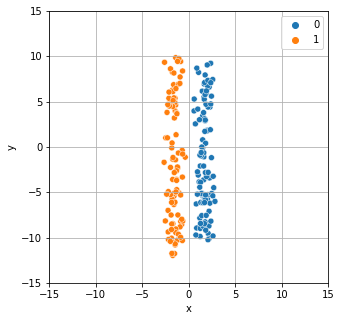

In [17]:
plot_data_points(X, y, xlim=(-15, 15), ylim=(-15, 15))

Как видно, наши данные идеально разделяются прямой $x=0$

Функция $plot\_knn\_bound$ принимает на вход объекты $X$, метки классов $y$, метод нормализации признаков $scaler$, число соседей $n\_neighbors$ и границы рисунка $xlim$, $ylim$. Функция обучает $KNN$ классификатор с числом соседей $n\_neighbors$ и визуализирует разделяющую поверхность для классов, полученную с помощью обученного $KNN$ классификатора.

* Если вы не можете различить _выбранные нами цвета_, то измените список цветов в переменных cmap_light и cmap_bold. Актуальный список возможных цветов находится [здесь](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [18]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def plot_knn_bound(X, y, scaler=None, n_neighbors=10, xlim=(-15, 15), ylim=(-20, 20)):
    # step size in the mesh
    h = 0.05

    # Create color maps
    cmap_light = ListedColormap(['C0', 'orange', 'cyan', 'green'][:np.unique(y).shape[0]])
    cmap_bold = ['C0', 'orange', 'c', 'darkgreen'][:np.unique(y).shape[0]]

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    X_scaled = X # if scaler is None
    if scaler is not None:
        grid = scaler.transform(grid)
        X_scaled = scaler.transform(X)

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='brute')
    clf.fit(X_scaled, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y,
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Разделющие поверхности алгоритма {}-NN'.format(n_neighbors))
    plt.grid()
    plt.show()

Нарисуем разделющие поверхности $1$-$NN$ и $10$-$NN$

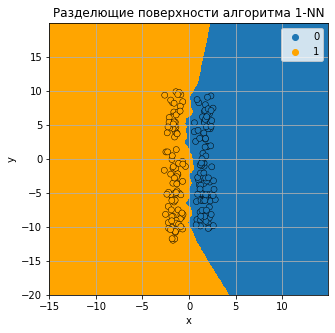

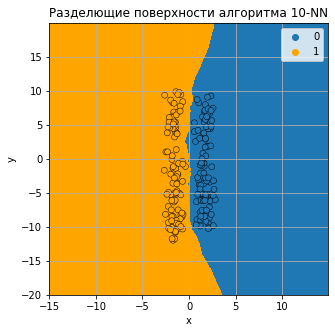

In [19]:
plot_knn_bound(X, y, n_neighbors=1)
plot_knn_bound(X, y, n_neighbors=10)

**Задание 1.2** (кросс, 2 балла) Чем отличаются поверхности, полученные при числе соседей 1 и 10? Объясните, чем вызваны данные отличия

При 10 соседях поверхность более гладкая, это свяазано с тем что класс сильно не меняется при большом числе соседей

**Задание 1.3** (кросс, 3 балла) Объясните, почему наблюдается сильное отклоенние разделяющей поверхности от прямой $x=0$ при значениях $y < -10$ и $y > 10$. Дайте строгое математическое обоснование наблюдаемого явления

Потому что мы строим серединный перпендикуляр, а y min(максимальный элемент) у 1 класса находится ниже(выше), чем у класса 0, и получается вот такой косой серединный перпендикуляр

Данную проблему может решить нормализация признакового пространства. 

**Задание 1.4** (кросс, 1 балл) Начертите разделяющие поверхности для $KNN$, обученного на нормализованных признаках с помощью реализованных вами нормализаторов. Используйте функцию $plot\_knn\_bound$

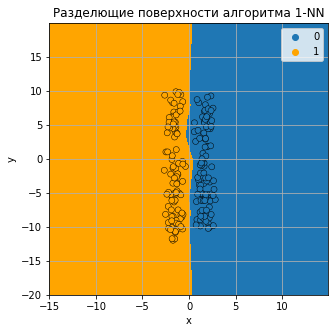

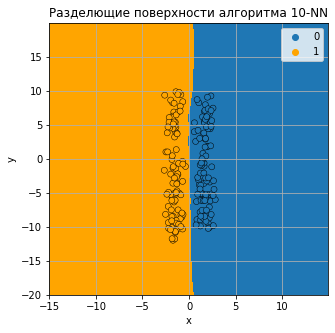

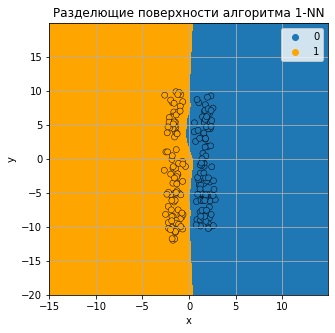

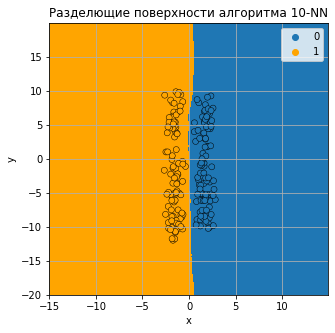

In [20]:
#ваш код
scaler = MinMaxScaler()
scaler.fit(X)
plot_knn_bound(X, y, scaler = scaler, n_neighbors=1)
plot_knn_bound(X, y, scaler = scaler, n_neighbors=10)
scaler = StandardScaler()
scaler.fit(X)
plot_knn_bound(X, y, scaler = scaler, n_neighbors=1)
plot_knn_bound(X, y, scaler = scaler, n_neighbors=10)

**Задание 1.5** (кросс, 4 балла) Пусть дано произвольное число точек на плоскости. Представим, что каждая точка - это отдельный класс. Пусть на данной выборке был обучен $1-NN$ классификатор. Чем с геометрической точки зрения являются разделяющие поверхности этого классификатора? Требуется математически строго, однозначно и с полным обоснованием определить геометрическое место точек разделяющих поверхностей.

В качестве примера ниже представлена визуализация для четырех точек

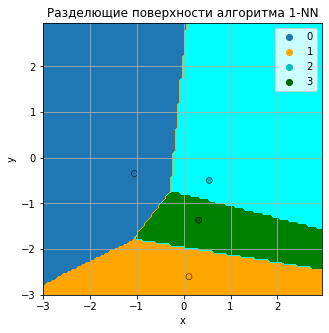

In [21]:
X = np.random.randn(4, 2)
y = np.arange(4)
plot_knn_bound(X, y, n_neighbors=1, xlim=(-3, 3), ylim=(-3, 3))

для двух объектов: $\vec{r_1} = (x_1, y_1) \vec{r_2} = (x_2, y_2)$ $d(x_1, x) = d(x_2, x)$ из этого уранвения поулчаем уранвение прямой $2x(x_2-x_1)+2y(y_2-y_1)=x_2^2-x_1^2+y_2^2-y_1^2$
это уравнение прямой $ax+by=c$ те разделяющая поверхностт это прямые
нормаль к этой прямой $(x_2-x_1, y_2-y_1) =\vec{r_2} - \vec{r_1} $ заметим, что $(\frac{x_2+x_1}{2},\frac{y_1+y_1}{2})$ лежит на прямой. $                  \vec({r_2}+\vec{r_1})/2$ это середина отрезка соединяющего наши векторы, те граница разделяющая эти объекты будет серединный перпендикуляр, соединяющий эти объекты.
для трех объектов: аналогично, получится пересечение попарных серединных перпендикуялров,но так как точка(точка пересечения) равноудалена от всех трех объектов, то она явлется центром описанной окружности, проходящей через наши заданные объекты.
для четрых объектов: выбиратеся 3 точки через них строится окржуонсть, проводятся нужные перпендикуляры, после строится окружность содержщая невыбранную точку, получаем две тчоки равноудаленных от трех объектов, разделающая поверхность - первые перпендикулры (непересекающиеся со  вторыми) и отрезки полученные отсечением от первых вторыми перпендикулярами



# Часть 2. Кросс-валидация на задаче регрессии

При решении прикладных задач, как правило, доступна лишь обучающая выборка. Для того чтобы иметь возможность оценить качество модели на тестовой выборке, прибегают к методу, называемому кросс-валидация.   
Пусть зафиксирован некоторый набор параметров модели. В $KNN$ под параметрами могут пониматься число соседей, метрика близости $\rho$, стратегия выбора весов $w_i$. При кросс-валидации **обучающая** выборка делится на $n$ равных частей (folds). Затем обучаются $n$ моделей с заданными параметрами (у всех моделей параметры одинаковые и фиксированы) - $i$-ая модель обучается на всей обучающей выборке, кроме объектов, которые попали в $i$-ый фолд (out-of-fold). Затем измеряется качество $i$-ой модели на $i$-ом фолде. Так как он не участвовал в обучении этой модели, то полученная оценка качества модели будет являться корректной. Финальным значением метрики качества для модели с заданными параметрами является среднее полученных нами значений на $n$ фолдах.



*Подумайте, как в описанную выше схему корректно добавить обучение нормализаторов*



Принцип работы кросс-валидации схематично изображен на рисунке.

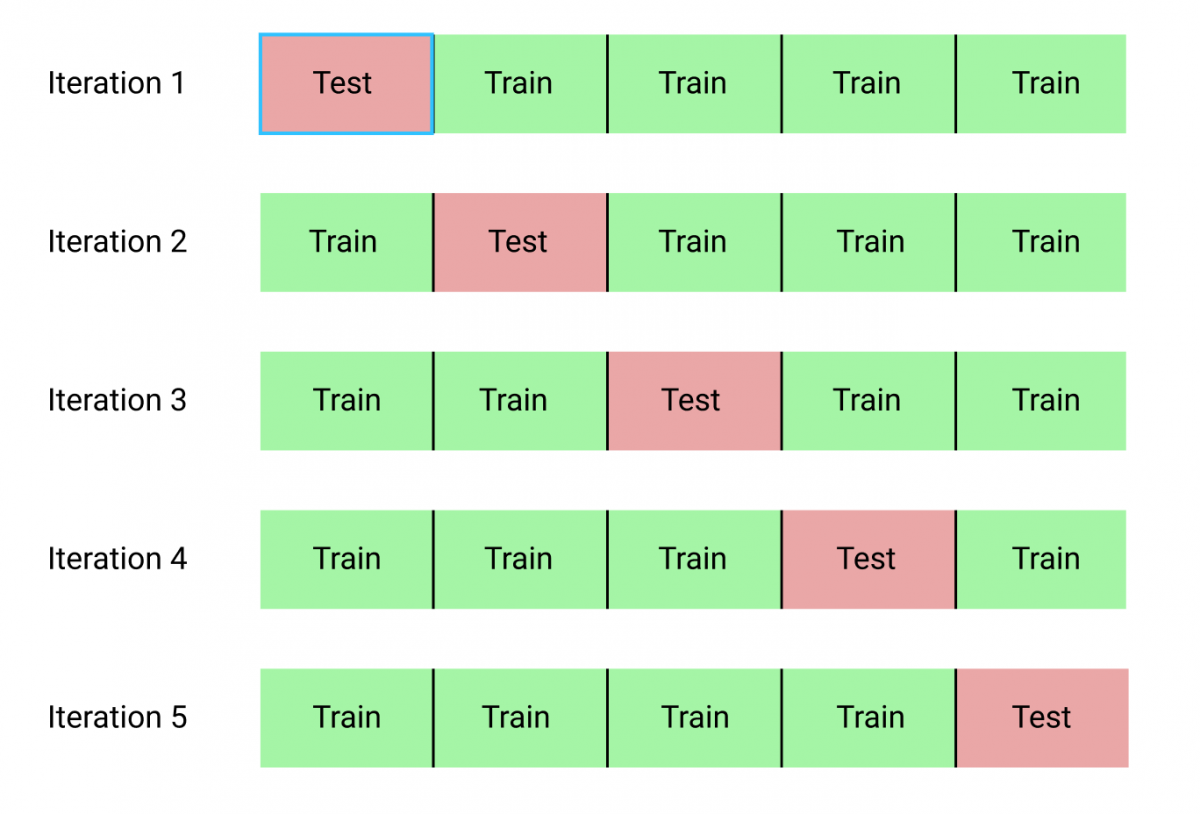

Небольшое видео объяснение о том, как работает кросс-валидация, можно посмотреть по [ссылке](https://www.youtube.com/watch?v=fSytzGwwBVw)

**Задание 2.1** (тест, 10 баллов) В модуле cross\_val.py реализуйте функции

* $kfold\_split$, которая реализует генерацию индексов обучающей и валидационной выборок для кросс-валидации
* $knn\_cv\_score$, которая реализует кросс-валидацию для $KNN-$модели

Далее будем решать задачу предсказания цены дома в Калифорнии с помощью $KNN$-регрессии. В качестве метрики качества будем использовать $R^2-$score.

$R^2(y\_true, y\_predict) = 1 - \frac{\sum_{i=1}^{n} (y\_true_i - y\_predict_i)^2}{\sum_{i=1}^{n} (y\_true_i - E(y\_true_i))^2}$ 

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [23]:
X, y = fetch_california_housing(return_X_y=True)

**Задание 2.2** (кросс, 1 балл) Разбейте выборку на обучающую (75%) и тестовую (25%) с помощью функции $train\_test\_split$. Используйте параметр **random_state=42!** Не забудьте перемешать данные перед разбиением (см. параметры функции). Запустите кросс-валидацию на 3 фолдах с помощью реализованных вами функций $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $r2\_score$. Параметры для перебора описаны ниже

In [24]:
from sklearn.metrics import r2_score

parameters = {
    'n_neighbors': [1, 5, 10],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(None, 'None'), (MinMaxScaler(), 'MinMax'), (StandardScaler(), 'Standard')]
}
score_function = r2_score

**После того, как вы локально реализовали и протестировали модуль cross_val.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки**

In [25]:
from cross_val import kfold_split, knn_cv_score
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.25, random_state=42)
#ваш код
folds = kfold_split(len(y_train), 3)
knn_cv_score(X_train, y_train, parameters, score_function, folds, neighbors.KNeighborsRegressor)

{('None', 1, 'euclidean', 'uniform'): -0.2698362539419594,
 ('MinMax', 1, 'euclidean', 'uniform'): 0.5329368736058075,
 ('Standard', 1, 'euclidean', 'uniform'): 0.5139255367340351,
 ('None', 1, 'euclidean', 'distance'): -0.2698362539419594,
 ('MinMax', 1, 'euclidean', 'distance'): 0.5329368736058075,
 ('Standard', 1, 'euclidean', 'distance'): 0.5139255367340351,
 ('None', 1, 'cosine', 'uniform'): 0.10527040776150857,
 ('MinMax', 1, 'cosine', 'uniform'): 0.4590323476108448,
 ('Standard', 1, 'cosine', 'uniform'): 0.47958515234726945,
 ('None', 1, 'cosine', 'distance'): 0.1052704077615086,
 ('MinMax', 1, 'cosine', 'distance'): 0.4590323476108448,
 ('Standard', 1, 'cosine', 'distance'): 0.47958515234726945,
 ('None', 5, 'euclidean', 'uniform'): 0.0977684191856583,
 ('MinMax', 5, 'euclidean', 'uniform'): 0.6915621333110309,
 ('Standard', 5, 'euclidean', 'uniform'): 0.6793573692425973,
 ('None', 5, 'euclidean', 'distance'): 0.1199731657678866,
 ('MinMax', 5, 'euclidean', 'distance'): 0.69647

**Задание 2.3** (кросс, 3 балла) Какой наибольший $r2\_score$ удалось достичь на валидации? Какие закономерности вы видите? Обучите модель с наилучшими параметрами на всей обучающей выборке, измерьте $r2\_score$ на тестовой выборке.

Выведите результаты кросс-валидации

In [26]:
dict_answer = {('None', 1, 'euclidean', 'uniform'): -0.2698362539419594,
 ('MinMax', 1, 'euclidean', 'uniform'): 0.5329368736058075,
 ('Standard', 1, 'euclidean', 'uniform'): 0.5139255367340351,
 ('None', 1, 'euclidean', 'distance'): -0.2698362539419594,
 ('MinMax', 1, 'euclidean', 'distance'): 0.5329368736058075,
 ('Standard', 1, 'euclidean', 'distance'): 0.5139255367340351,
 ('None', 1, 'cosine', 'uniform'): 0.10527040776150857,
 ('MinMax', 1, 'cosine', 'uniform'): 0.4590323476108448,
 ('Standard', 1, 'cosine', 'uniform'): 0.47958515234726945,
 ('None', 1, 'cosine', 'distance'): 0.1052704077615086,
 ('MinMax', 1, 'cosine', 'distance'): 0.4590323476108448,
 ('Standard', 1, 'cosine', 'distance'): 0.47958515234726945,
 ('None', 5, 'euclidean', 'uniform'): 0.0977684191856583,
 ('MinMax', 5, 'euclidean', 'uniform'): 0.6915621333110309,
 ('Standard', 5, 'euclidean', 'uniform'): 0.6793573692425973,
 ('None', 5, 'euclidean', 'distance'): 0.1199731657678866,
 ('MinMax', 5, 'euclidean', 'distance'): 0.6964752425342953,
 ('Standard', 5, 'euclidean', 'distance'): 0.6834229913464561,
 ('None', 5, 'cosine', 'uniform'): 0.37805502479959713,
 ('MinMax', 5, 'cosine', 'uniform'): 0.6429483717302537,
 ('Standard', 5, 'cosine', 'uniform'): 0.6639133943561187,
 ('None', 5, 'cosine', 'distance'): 0.3955985736693515,
 ('MinMax', 5, 'cosine', 'distance'): 0.6439729194747218,
 ('Standard', 5, 'cosine', 'distance'): 0.666103286084983,
 ('None', 10, 'euclidean', 'uniform'): 0.1157913069850766,
 ('MinMax', 10, 'euclidean', 'uniform'): 0.6955574490923349,
 ('Standard', 10, 'euclidean', 'uniform'): 0.6860471330995802,
 ('None', 10, 'euclidean', 'distance'): 0.14310059566240177,
 ('MinMax', 10, 'euclidean', 'distance'): 0.7035316821435433,
 ('Standard', 10, 'euclidean', 'distance'): 0.691615057187545,
 ('None', 10, 'cosine', 'uniform'): 0.3775295488771868,
 ('MinMax', 10, 'cosine', 'uniform'): 0.6595874224717159,
 ('Standard', 10, 'cosine', 'uniform'): 0.6765890035252449,
 ('None', 10, 'cosine', 'distance'): 0.40894335310524665,
 ('MinMax', 10, 'cosine', 'distance'): 0.6650747099452022,
 ('Standard', 10, 'cosine', 'distance'): 0.6829471618912982}

sorted_tuples = sorted(dict_answer.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
sorted_dict

{('None', 1, 'euclidean', 'uniform'): -0.2698362539419594,
 ('None', 1, 'euclidean', 'distance'): -0.2698362539419594,
 ('None', 5, 'euclidean', 'uniform'): 0.0977684191856583,
 ('None', 1, 'cosine', 'uniform'): 0.10527040776150857,
 ('None', 1, 'cosine', 'distance'): 0.1052704077615086,
 ('None', 10, 'euclidean', 'uniform'): 0.1157913069850766,
 ('None', 5, 'euclidean', 'distance'): 0.1199731657678866,
 ('None', 10, 'euclidean', 'distance'): 0.14310059566240177,
 ('None', 10, 'cosine', 'uniform'): 0.3775295488771868,
 ('None', 5, 'cosine', 'uniform'): 0.37805502479959713,
 ('None', 5, 'cosine', 'distance'): 0.3955985736693515,
 ('None', 10, 'cosine', 'distance'): 0.40894335310524665,
 ('MinMax', 1, 'cosine', 'uniform'): 0.4590323476108448,
 ('MinMax', 1, 'cosine', 'distance'): 0.4590323476108448,
 ('Standard', 1, 'cosine', 'uniform'): 0.47958515234726945,
 ('Standard', 1, 'cosine', 'distance'): 0.47958515234726945,
 ('Standard', 1, 'euclidean', 'uniform'): 0.5139255367340351,
 ('Stand

Лучший результат с парааметрами 'MinMax', 10, 'euclidean', 'distance', закономерность = без нормализаторов показывается плохой скор

Обучите модель с лучшими по валидации параметрами на обучающей выборке

In [27]:
#ваш код
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_fit = scaler.transform(X_train)
model = neighbors.KNeighborsRegressor(n_neighbors= 10, metric = "euclidean", weights = 'distance')
model.fit(X_train_fit, y_train)

y_pred= model.predict(scaler.transform(X_test))
r2_score(y_test, y_pred)

0.7117082182374788

# Часть 3. Работа с текстовыми данными

Далее будем решать задачу классификации новостного текста к одному из 20 классов, каждый класс соответствует определенной новостной тематике. В качестве метрики качества будем использовать $accuracy\_score$. Accuracy - это доля верно классифицированных объектов, среди всех объектов выборки.

In [28]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=42)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=42)

In [30]:
print(X_train[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [31]:
X_train = np.array(X_train, dtype=object)

In [32]:
X_test = np.array(X_test, dtype=object)

In [33]:
y_train = np.array(y_train)
y_test = np.array(y_test)

Как мы видим, объектами обучающей выборки являются тексты. Сырые текстовые данные не могут служить обучающими примерами для алгоритма $KNN$. Перед использованием $KNN$ текстовые данные переменной длины необходимо отобразить в метрическое пространство фиксированной размерности.

Работа с текстовыми данными проходит в несколько этапов.

* **Токенизация.** Текстовая строка делится на токены. Как правило, в качестве токенов выступают отдельные слова и знаки препинания.

* **Нормализация.** Приведение к нижнему регистру, удаление стоп-слов, удаление пунктуации, удаление редких и частотных слов и т.д.

* **Векторизация.** Фиксируется словарь токенов $V$ по **обучающей** выборке. Текст представлется в виде вектора длиной $|V|$, где каждый признак есть функция от частоты встречаемости токена в тексте и в обучающей выборке.

В данном задании будет использовано два вида векторизации. Первый, $CountVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа. Второй, $TfidfVectorizer$, сопоставляет каждому токену частоту встречаемости этого токена в тексте документа умноженную на величину обратно пропорциональную частоте встречаемости токена во всех документах **обучающей** выборки. Подробне про $tf-idf$ можно прочитать [здесь](https://ru.wikipedia.org/wiki/TF-IDF).

В sklearn все векторизаторы автоматически токенизируют текст и приводят его к нижнему регистру. Параметры $max\_df$ и $min\_df$ позволяют убрать из словаря наиболее частые и наиболее редкие токены. Параметр $stop\_words$ позволяет убрать из словаря стоп-слова (малоинформативные слова для данного языка, например, союзы).

In [34]:
count_vec = CountVectorizer(max_df=0.8, min_df=10, stop_words='english')
tf_idf = TfidfVectorizer(max_df=0.8, min_df=10, stop_words='english')

**Задание 3.1** (кросс, 2 балла) Найдите оптимальные параметры обучения модели. Осуществлять перебор параметров следует по заданной ниже сетке. Используйте реализованные вами функции $kfold\_split$, $knn\_cv\_score$. В качестве метрики используйте $accuracy\_score$. 3х фолдов для кросс-валидации будет достаточно.

In [35]:
from sklearn.metrics import accuracy_score

parameters = {
    'n_neighbors': [i for i in range(1, 11)],
    'metrics': ['euclidean', 'cosine'],
    'weights': ['uniform', 'distance'],
    'normalizers': [(count_vec, 'CountVectorizer'), (tf_idf, 'TfidfVectorizer')]
}

Если вы все сделаете правильно, то запущенная вами кросс-валидация будет работать примерно 7 минут. Дождитесь ее завершения, не закрывайте и не перезагружайте этот colab ноутбук.

In [36]:
folds = kfold_split(len(y_train), 3)
res = knn_cv_score(X_train, y_train, parameters, accuracy_score, folds, neighbors.KNeighborsClassifier)

In [41]:
res

{('CountVectorizer', 1, 'euclidean', 'uniform'): 0.5788394464311978,
 ('TfidfVectorizer', 1, 'euclidean', 'uniform'): 0.7820399236644299,
 ('CountVectorizer', 1, 'euclidean', 'distance'): 0.5788394464311978,
 ('TfidfVectorizer', 1, 'euclidean', 'distance'): 0.7820399236644299,
 ('CountVectorizer', 1, 'cosine', 'uniform'): 0.7664838188107246,
 ('TfidfVectorizer', 1, 'cosine', 'uniform'): 0.7820399236644299,
 ('CountVectorizer', 1, 'cosine', 'distance'): 0.7664838188107246,
 ('TfidfVectorizer', 1, 'cosine', 'distance'): 0.7820399236644299,
 ('CountVectorizer', 2, 'euclidean', 'uniform'): 0.47719622945252316,
 ('TfidfVectorizer', 2, 'euclidean', 'uniform'): 0.731395102941379,
 ('CountVectorizer', 2, 'euclidean', 'distance'): 0.5791930688322138,
 ('TfidfVectorizer', 2, 'euclidean', 'distance'): 0.7820399236644299,
 ('CountVectorizer', 2, 'cosine', 'uniform'): 0.7119503468217899,
 ('TfidfVectorizer', 2, 'cosine', 'uniform'): 0.731395102941379,
 ('CountVectorizer', 2, 'cosine', 'distance'): 

**Задание 3.2** (кросс, 2 балла) Какой метод предобработки данных в среднем дает наилучший результат? Почему?

In [37]:
#ваш код
sorted_tuples = sorted(res.items(), key=lambda item: item[1])
sorted_dict = {k: v for k, v in sorted_tuples}
sorted_dict

{('CountVectorizer', 10, 'euclidean', 'uniform'): 0.43503401102289535,
 ('CountVectorizer', 9, 'euclidean', 'uniform'): 0.4411328608806824,
 ('CountVectorizer', 8, 'euclidean', 'uniform'): 0.4511207135176744,
 ('CountVectorizer', 7, 'euclidean', 'uniform'): 0.4561590945541775,
 ('CountVectorizer', 6, 'euclidean', 'uniform'): 0.46208143785633493,
 ('CountVectorizer', 5, 'euclidean', 'uniform'): 0.46729644261957476,
 ('CountVectorizer', 3, 'euclidean', 'uniform'): 0.46897606700462563,
 ('CountVectorizer', 4, 'euclidean', 'uniform'): 0.4699484231534232,
 ('CountVectorizer', 2, 'euclidean', 'uniform'): 0.47719622945252316,
 ('CountVectorizer', 10, 'euclidean', 'distance'): 0.5007062371305114,
 ('CountVectorizer', 9, 'euclidean', 'distance'): 0.5054789678331566,
 ('CountVectorizer', 8, 'euclidean', 'distance'): 0.5134335736840817,
 ('CountVectorizer', 7, 'euclidean', 'distance'): 0.5197969959015422,
 ('CountVectorizer', 6, 'euclidean', 'distance'): 0.5322597132269963,
 ('CountVectorizer', 5

ВАШ ОТВЕТ лучший метод предобработки 'TfidfVectorizer', 4, 'cosine', 'distance', потому что Tfid учитывает важность слов в документе(хорошо нормирует веса)

**Задание 3.3** (кросс, 2 балла) Какая метрика близости позволяет в среднем достичь наилучшее качество? Почему?

In [38]:
#ваш код
n_cosine = 0
sum_cosine = 0
n_euclidean = 0
sum_euclidean = 0
for key in sorted_dict:
  if key[2] == "euclidean":
    n_euclidean += 1
    sum_euclidean += sorted_dict[key]
  else:
    n_cosine += 1
    sum_cosine += sorted_dict[key]
print(sum_cosine/n_cosine, sum_euclidean/n_euclidean)

0.7508174905107807 0.6319266303351874


ВАШ ОТВЕТ в среднем лучший результат показывает  косинусная метрика, потому что данные не нормализированы

**Задание 3.4** (кросс, 2 балла) Начертите график зависимости метрики качества от числа соседей. Метрику следует усреднить по всем параматрам, кроме числа соседей. Сделайте выводы о наблюдаемых зависимостях (возможно будет полезным ознакомиться с названиями классов)

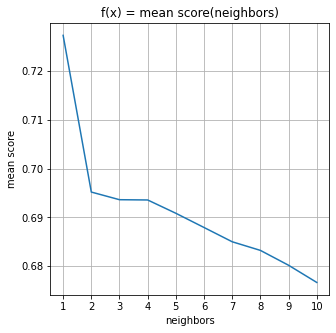

In [39]:
#ваш код
sum = [0]*10
n = [0]*10
for key in sorted_dict:
  sum[key[1] -1] += sorted_dict[key]
  n[key[1] -1] += 1
mean = list(map(lambda x, y:x/y, sum, n))
plt.plot([i for i in range(1,11)],mean)
plt.rcParams["figure.figsize"] = (5,5)
plt.ylabel("mean score")
plt.xlabel("neighbors")
plt.title("f(x) = mean score(neighbors)")
plt.xticks([i for i in range(1,11)])
plt.grid(True)
plt.show()

ВАШ ОТВЕТ Лучший результат при количестве соседей 1, потому что много похожих классов(начинаающихся с одного тега), потоэтому лучше брать какого-то одного соседа

**Задание 3.5** (кросс, 3 балла) Оцените точность вашей лучшей модели на тестовой части датасета. Отличается ли оно от качества, полученного на кросс-валидации? Почему?

In [40]:
#ваш код
scaler = TfidfVectorizer()
scaler.fit(X_train)
X_train_fit = scaler.transform(X_train)
model = neighbors.KNeighborsClassifier(n_neighbors= 4, metric = "cosine", weights = 'distance')
model.fit(X_train_fit, y_train)

y_pred= model.predict(scaler.transform(X_test))
accuracy_score(y_test, y_pred)

0.6865374402549124

ВАШ ОТВЕТ отличается, потому что подбирали гиперпараметры под валидационную часть